In [5]:
#TRABAJANDO CON SECRETOS DESDE GOOGLE
'''
# Si no tenemos el módulo instalado
# !pip install google-cloud-secret-manager
# Primero autenticamos el usuario :
import sys
if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

from google.cloud import secretmanager

# Creamos un Cliente de SecretManager:
client = secretmanager.SecretManagerServiceClient()
secret_name = "openai-token" # => Cambia por el nombre de tu secreto (en google cloud secret manager)
project_id = 'xxxxxx' # => Cambia por el id de tu proyecto Google Cloud

# Construye un F-string con los datos:
resource_name = f"projects/{project_id}/secrets/{secret_name}/versions/latest"

# REcupera tu secreto :
response = client.access_secret_version(request={"name": resource_name})
secret_string = response.payload.data.decode('UTF-8')

# Tu clave secreta queda bajo secret_string
'''

'\n# Si no tenemos el módulo instalado\n# !pip install google-cloud-secret-manager\n# Primero autenticamos el usuario :\nimport sys\nif "google.colab" in sys.modules:\n    from google.colab import auth\n    auth.authenticate_user()\n\nfrom google.cloud import secretmanager\n\n# Creamos un Cliente de SecretManager:\nclient = secretmanager.SecretManagerServiceClient()\nsecret_name = "openai-token" # => Cambia por el nombre de tu secreto (en google cloud secret manager)\nproject_id = \'xxxxxx\' # => Cambia por el id de tu proyecto Google Cloud\n\n# Construye un F-string con los datos:\nresource_name = f"projects/{project_id}/secrets/{secret_name}/versions/latest"\n\n# REcupera tu secreto :\nresponse = client.access_secret_version(request={"name": resource_name})\nsecret_string = response.payload.data.decode(\'UTF-8\')\n\n# Tu clave secreta queda bajo secret_string\n'

## Creando embeddings

In [9]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import numpy as np


In [3]:
# Cargar variables de entorno
load_dotenv()

# Configurar el motor de OpenAI
#engine = "gpt-3.5-turbo"
engine = "gpt-4-1106-preview"
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [21]:
def get_completion(prompt):
  completion = client.chat.completions.create(
  model=engine,
  messages=[
      {"role": "system", "content": "Eres un asistente, que realizas resúmenes concisos y proporcionas la ideas principales de un texto."},
      {"role": "user", "content": f"{prompt}"}
    ]
  )
  return completion

def get_embedding(text):
    response = client.embeddings.create(
        model="text-embedding-ada-002",
        input=text
    )
    # Obtener el embedding del primer elemento de la respuesta
    embedding = response.data[0].embedding
    return embedding

# Utilizar la función
texto = "marciano"
embedding = get_embedding(texto)
print(embedding[:10])

[-0.029385026544332504, -0.0012012168299406767, 0.011176757514476776, -0.03238514065742493, -0.006499127019196749, 0.016272930428385735, -0.017625659704208374, -0.017866740003228188, -0.015455935150384903, -0.012368765659630299]


## Capturando significado con embeddings y visualizando

In [25]:
# Se pasan varios inputs diferentes

in_1 = "Hemos observado un ibis volando hacia la laguna"
in_2 = "Avistada una nutria en la costa"
in_3 = "Un perro parece divertirse con los delfines"

in_4 = "La ensalada de aguacate está deliciosa!"
in_5 = "Me encanta la comida japonesa!"

in_6 = "Los programadores de Python son gente genial"
in_7 = "TypeScript, C++ o Java? Todos molan!"

in_8 = "El Real Madrid es el equipo con más Champions en todo el mundo"
in_9 = "En el fútbol sólo hay un equipo que tiene 14 títulos de Champions League; el Real Madrid"

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7, in_8, in_9]

- Obtenemos embeddings para todas las piezas de texto.
- Las almacenamos en un array NumPy 2D (una fila por cada embedding).

In [26]:
embeddings = []
for input_text in input_text_lst_news:
    emb = get_embedding(input_text)
    embeddings.append(emb)

embeddings_array = np.array(embeddings)

In [27]:
# Visualización de los embeddings en forma de array

print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (9, 1536)
[[ 1.25479957e-04 -7.85998534e-03  1.43161770e-02 ... -6.89882878e-03
  -7.03162048e-03  6.23171031e-03]
 [-4.28282470e-03 -4.33896668e-04  1.68746505e-02 ... -1.13182068e-02
  -6.25581155e-03  6.84730621e-05]
 [-1.86022837e-02 -1.79655608e-02  1.13236718e-02 ...  1.37020170e-03
  -3.22418776e-03  1.13611259e-02]
 ...
 [-1.53742796e-02 -1.96210202e-02  1.51189370e-02 ...  5.86950732e-03
   2.05079988e-02 -1.77126750e-02]
 [-2.44891234e-02 -4.57151048e-03  1.77763694e-03 ... -2.50733811e-02
  -1.79255418e-02  2.15056771e-03]
 [-2.23355200e-02 -3.45236552e-03  1.47609748e-02 ... -4.46804304e-04
  -1.84042696e-02  3.84674268e-03]]


#### Reducimos de 768 a 2 dimensiones para visualizar
- Usamos principal component analysis (PCA).

In [28]:
from sklearn.decomposition import PCA

# Hacemos PCA para 2D
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
dosD_values = PCA_model.transform(embeddings_array)

In [29]:
print("Shape: " + str(dosD_values.shape))
print(dosD_values)

Shape: (9, 2)
[[-0.0930788   0.28984864]
 [-0.13665641  0.28559391]
 [-0.07443462  0.20800524]
 [-0.19045673 -0.08454149]
 [-0.16644307 -0.22307785]
 [-0.07832273 -0.18411101]
 [-0.08159521 -0.27086834]
 [ 0.39406928 -0.01941517]
 [ 0.42691828 -0.00143394]]


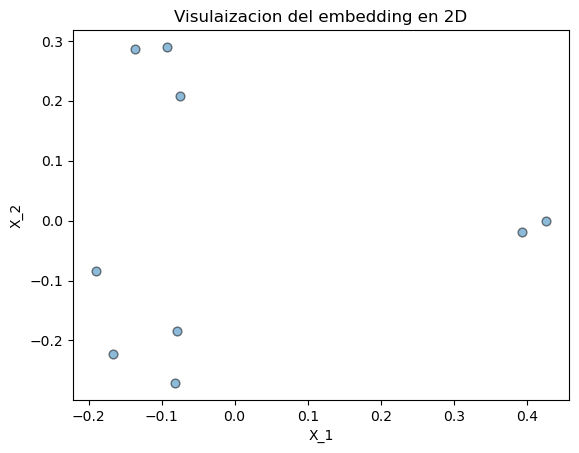

In [30]:
import matplotlib.pyplot as plt
import mplcursors

def plot_2D(x_values, y_values, labels):

    # Creamos scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values,
                         y_values,
                         alpha = 0.5,
                         edgecolors='k',
                         s = 40)

    # Creamos a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Visulaizacion del embedding en 2D')
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12)

    plt.show()


plot_2D(dosD_values[:,0], dosD_values[:,1], input_text_lst_news)

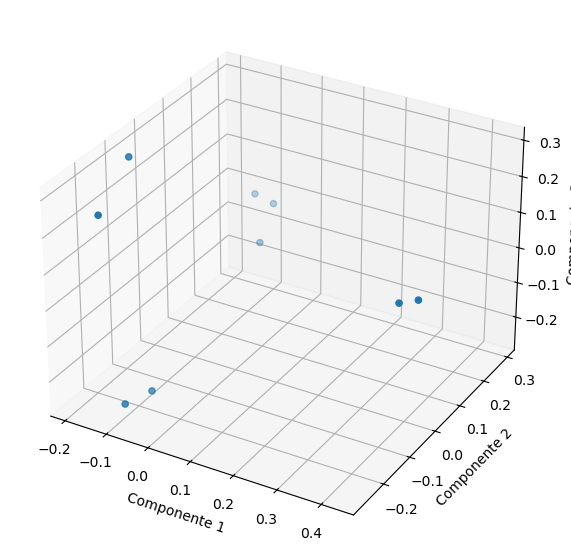

In [32]:
# Perform PCA for 3D visualization
PCA_model = PCA(n_components = 3)
PCA_model.fit(embeddings_array)
embeddings_3d = PCA_model.transform(embeddings_array)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Supongamos que embeddings_3d es tu matriz de embeddings reducida a 3 dimensiones
x, y, z = embeddings_3d[:,0], embeddings_3d[:,1], embeddings_3d[:,2]
ax.scatter(x, y, z)

# Etiquetar los ejes (opcional)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')

plt.show()

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [19]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

Hemos observado un ibis volando hacia la laguna
Avistada una nutria en la costa
[[0.87020765]]


In [20]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

Hemos observado un ibis volando hacia la laguna
La ensalada de aguacate está deliciosa!
[[0.78791433]]


In [24]:
# Comparación de la similitud entre in_4-in_5 vs in_1-in_6

print(f"La similitud entre la frase '{in_4}' y la frase '{in_5}' es de: {compare(embeddings,3,4)}")
print(f"La similitud entre la frase '{in_1}' y la frase '{in_6}' es de: {compare(embeddings,0,5)}")

La similitud entre la frase 'La ensalada de aguacate está deliciosa!' y la frase 'Me encanta la comida japonesa!' es de: [[0.85938312]]
La similitud entre la frase 'Hemos observado un ibis volando hacia la laguna' y la frase 'Los programadores de Python son gente genial' es de: [[0.76803736]]


In [ ]:
# Comparación de la similitud entre in_8-in_9

print(f"La similitud entre la frase '{in_8}' y la frase '{in_9}' es de: {compare(embeddings,74)}")